This dataset contains a list of video games with sales greater than 100,000 copies. It was scrape from vgchartz.com 

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Data 👇

Top Selling Games:

What are the top-selling games based on global sales revenue?

What is the total global sales revenue across all years?

In [4]:
df = pd.read_csv("../DataSets/vgsales.csv") 

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.sort_values('Global_Sales', ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [7]:
df['Global_Sales'].sum()

8920.44

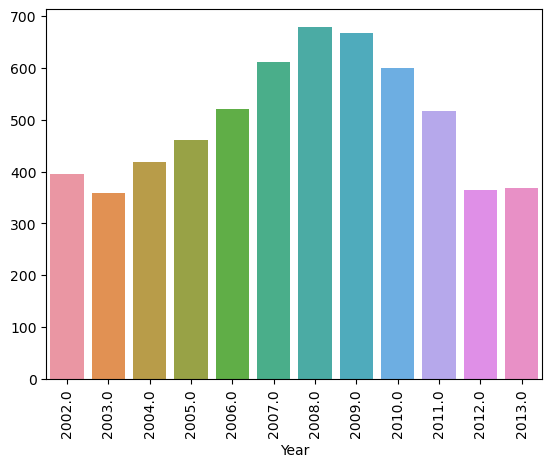

In [8]:
a1 = df.groupby('Year')['Global_Sales'].sum().nlargest(12)
sb.barplot(x=a1.index,y=a1.values)
plt.xticks(rotation=90)
plt.show()

Platform Performance:

Which platform has the highest total global sales revenue?

Are there any platforms that consistently produce top-selling games over time?

How does the distribution of global sales revenue vary across different platforms?

In [9]:
df.groupby('Platform')['Global_Sales'].sum().nlargest(3)

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Name: Global_Sales, dtype: float64

In [10]:
b = df.groupby('Platform')['Global_Sales'].mean().nlargest(5)
b

Platform
GB      2.606633
NES     2.561939
GEN     1.050370
SNES    0.837029
PS4     0.827679
Name: Global_Sales, dtype: float64

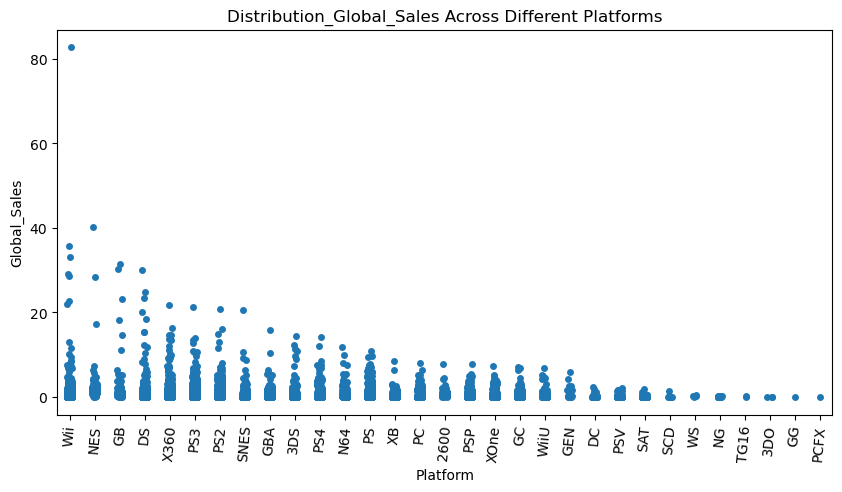

In [11]:
plt.figure(figsize=(10,5))
sb.stripplot(x=df.Platform, y=df.Global_Sales)
plt.title('Distribution_Global_Sales Across Different Platforms')
plt.xticks(rotation=85)
plt.show()

Genre Analysis:

What are the most popular genres in terms of global sales revenue?

Are certain genres more successful on specific platforms or in particular regions?

Can we identify any emerging trends or shifts in genre preferences over time?

In [12]:
c1 = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
c1

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

In [13]:
c2 = pd.pivot_table(df,index='Genre',columns='Platform',values='Global_Sales', aggfunc='sum',margins=True).nlargest(15,'All')
c2

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne,All
Genre,,,,,,,,,,,,,,,,,,,,,
All,97.08,0.10,247.46,15.97,822.49,255.45,318.50,199.36,28.36,0.04,...,1.87,200.05,0.16,1.42,926.71,81.86,979.96,258.26,141.06,8920.44
Action,29.34,NaN,57.02,1.26,115.56,7.92,55.76,37.84,2.74,NaN,...,NaN,10.08,NaN,NaN,118.58,19.35,242.67,49.28,33.79,1751.18
Sports,3.43,NaN,6.20,3.66,31.83,9.05,16.41,25.49,3.20,NaN,...,NaN,17.87,NaN,NaN,292.06,3.32,139.12,54.27,23.97,1330.93
Shooter,26.48,NaN,1.29,0.33,8.20,1.20,3.60,13.63,0.13,NaN,...,NaN,6.07,0.02,NaN,28.77,6.17,278.55,63.55,51.61,1037.37
Role-Playing,NaN,NaN,75.74,0.68,126.85,88.24,64.21,13.15,0.27,NaN,...,0.06,36.43,NaN,1.22,14.06,2.47,71.98,13.51,9.48,927.37
Platform,13.27,NaN,32.23,2.54,77.45,54.91,78.30,28.66,15.45,0.04,...,1.50,65.65,NaN,NaN,90.74,21.24,11.39,9.66,0.81,831.37
Misc,3.58,NaN,10.48,NaN,137.76,13.35,36.25,16.73,0.03,NaN,...,0.10,5.02,NaN,NaN,221.06,12.23,91.96,9.58,6.86,809.96
Racing,2.91,NaN,14.49,2.65,38.64,4.55,18.80,21.89,0.26,NaN,...,0.07,13.49,NaN,NaN,61.28,7.77,65.99,31.49,8.80,732.04
Fighting,1.24,NaN,10.46,1.83,7.20,NaN,4.21,18.43,5.90,NaN,...,NaN,26.95,NaN,NaN,23.86,6.36,37.64,13.55,2.31,448.91


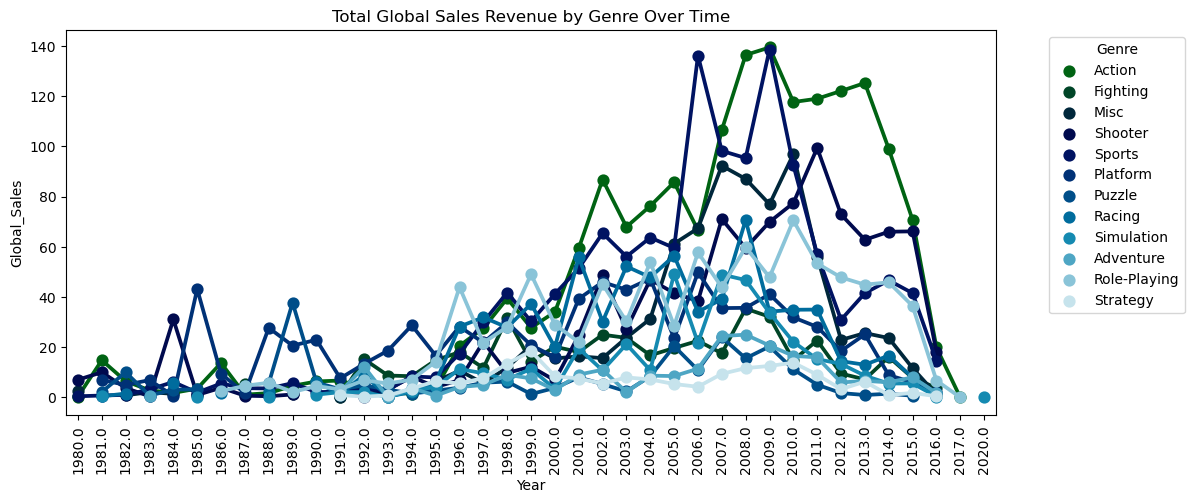

In [14]:
c3 = df.groupby(['Year', 'Genre'])[['Global_Sales']].sum()
c3 = c3.reset_index()
plt.figure(figsize=(12,5))
sb.pointplot(x=c3.Year,y=c3.Global_Sales,hue=c3.Genre,palette='ocean')
plt.title('Total Global Sales Revenue by Genre Over Time')
plt.xticks(rotation=90)
plt.legend(title='Genre', bbox_to_anchor=(1.05,1))
plt.show()

Publisher Performance:

Which publisher has the highest total global sales revenue according to genre?

How does the performance of publishers vary in different regions?

In [15]:
d1 = df.groupby(['Publisher', 'Genre'])['Global_Sales'].sum()
top_publisher = d1.groupby('Genre').idxmax().apply(lambda x: x[0])
top_publisher

Genre
Action          Take-Two Interactive
Adventure                   Nintendo
Fighting                         THQ
Misc                        Nintendo
Platform                    Nintendo
Puzzle                      Nintendo
Racing                      Nintendo
Role-Playing                Nintendo
Shooter                   Activision
Simulation           Electronic Arts
Sports               Electronic Arts
Strategy                    Nintendo
Name: Global_Sales, dtype: object

In [16]:
d1.groupby('Genre').idxmax()

Genre
Action          (Take-Two Interactive, Action)
Adventure                (Nintendo, Adventure)
Fighting                       (THQ, Fighting)
Misc                          (Nintendo, Misc)
Platform                  (Nintendo, Platform)
Puzzle                      (Nintendo, Puzzle)
Racing                      (Nintendo, Racing)
Role-Playing          (Nintendo, Role-Playing)
Shooter                  (Activision, Shooter)
Simulation       (Electronic Arts, Simulation)
Sports               (Electronic Arts, Sports)
Strategy                  (Nintendo, Strategy)
Name: Global_Sales, dtype: object

In [17]:
df.groupby('Publisher')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
10TACLE Studios,0.07,0.04,0.00,0.00,0.11
1C Company,0.01,0.07,0.00,0.02,0.10
20th Century Fox Video Games,1.82,0.10,0.00,0.01,1.94
2D Boy,0.00,0.03,0.00,0.01,0.04
3DO,6.48,3.04,0.00,0.63,10.12
...,...,...,...,...,...
id Software,0.02,0.00,0.00,0.00,0.03
imageepoch Inc.,0.00,0.00,0.04,0.00,0.04
inXile Entertainment,0.02,0.06,0.00,0.01,0.10


Regional Sales Analysis:

How do sales revenues vary across different regions (e.g., North America, Europe, Japan, Other)?


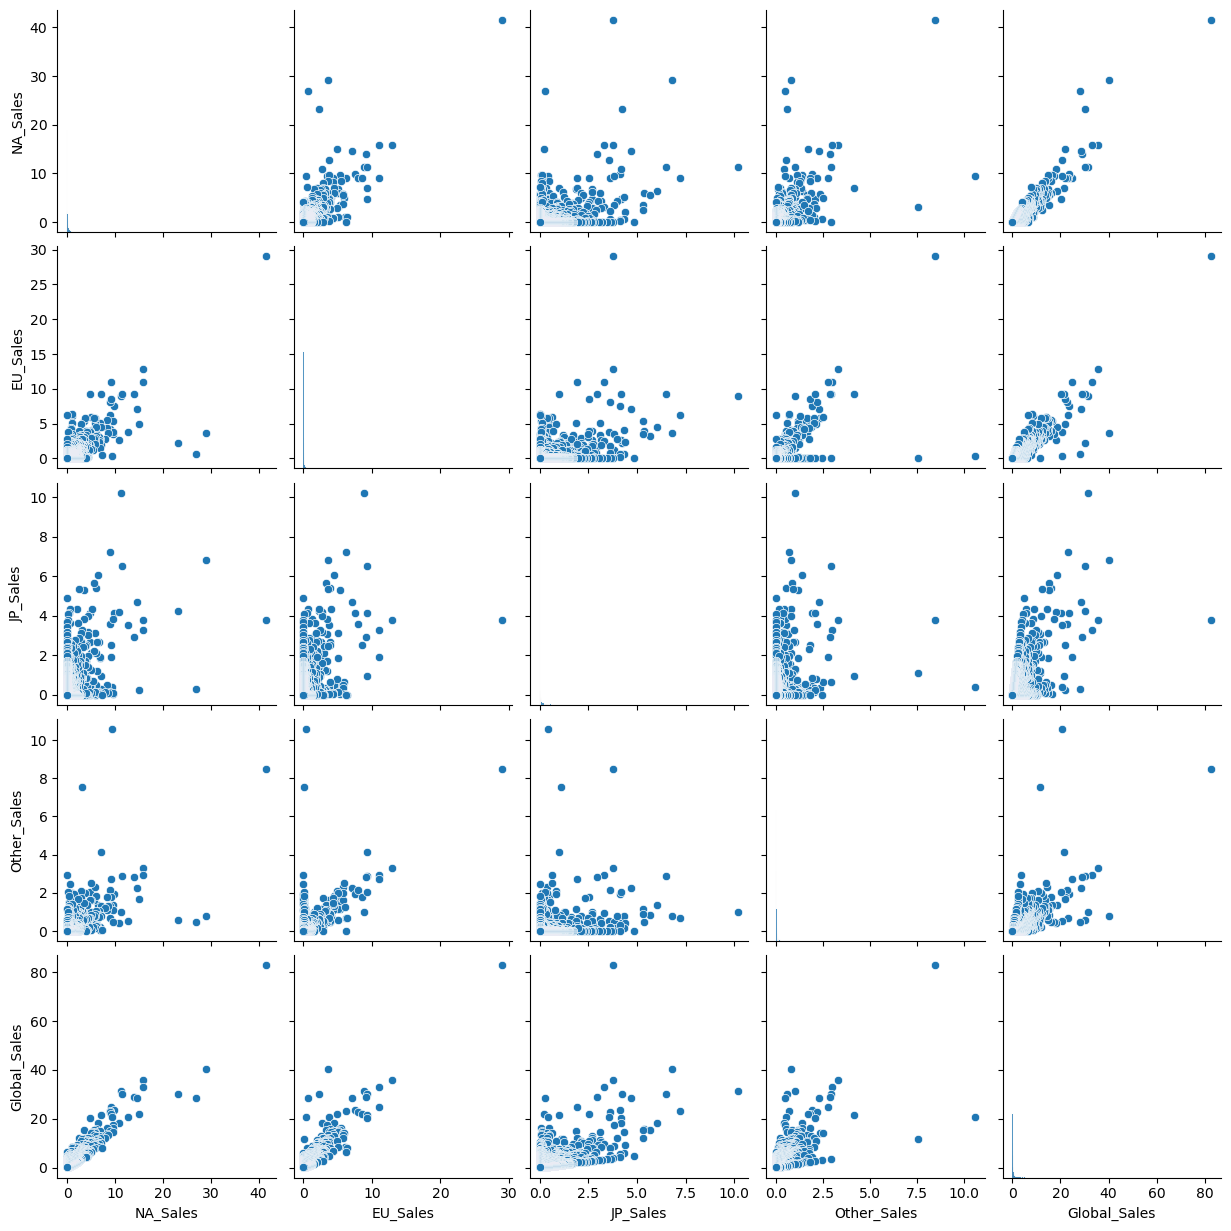

In [18]:
e1 = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
sb.pairplot(e1)
plt.show()

Distribution of Sales:

What is the distribution of sales revenue across different regions (e.g., North America, Europe, Japan, Other) for the top-selling games?

In [19]:
f1 = df.groupby('Name')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
f1 = f1.reset_index()
f1

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,'98 Koshien,0.15,0.10,0.12,0.03,0.41
1,.hack//G.U. Vol.1//Rebirth,0.00,0.00,0.17,0.00,0.17
2,.hack//G.U. Vol.2//Reminisce,0.11,0.09,0.00,0.03,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.00,0.00,0.16,0.00,0.16
4,.hack//G.U. Vol.3//Redemption,0.00,0.00,0.17,0.00,0.17
...,...,...,...,...,...,...
11488,thinkSMART: Chess for Kids,0.01,0.00,0.00,0.00,0.01
11489,uDraw Studio,1.67,0.58,0.00,0.20,2.46
11490,uDraw Studio: Instant Artist,0.09,0.10,0.00,0.02,0.21
11491,wwe Smackdown vs. Raw 2006,1.57,1.02,0.00,0.41,3.00


In [22]:
print(e1.columns.tolist())
nm = input("Enter column Name")
dt = f1.nlargest(10,nm)
dt

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
Enter column NameNA_Sales


,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11007,Wii Sports,41.49,29.02,3.77,8.46,82.74
9327,Super Mario Bros.,32.48,4.88,6.96,0.99,45.31
2590,Duck Hunt,26.93,0.63,0.28,0.47,28.31
9715,Tetris,26.17,2.95,6.03,0.69,35.84
3712,Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92
1222,Call of Duty: Black Ops,17.59,9.50,0.59,3.36,31.03
9341,Super Mario World,15.99,4.86,4.49,0.75,26.07
5573,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
11009,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
1228,Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35,30.83
